# Neural Netwoks

# Data fetch

In [1]:
import pandas as pd

In [2]:
class_name = 'Cultivars'

feature_cols = [
        'Alcohol',
        'Malic_acid',
        'Ash',
        'Alcalinity_of_ash',
        'Magnesium',
        'Total_phenols',
        'Flavanoids',
        'Nonflavanoid_phenols',
        'Proanthocyanins',
        'Color_intensity',
        'Hue',
        'OD280/OD315_of_diluted_wines',
        'Proline'
    ]

cols = feature_cols.copy()
cols.insert(0, class_name)

df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', 
                 header=None, names=cols)

features = df.drop(class_name, axis=1)
target = df[class_name]

df.head()

,Cultivars,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280/OD315_of_diluted_wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
import warnings
warnings.filterwarnings('ignore')
import keras
from keras.layers import Dense
from keras.models import Sequential

batch_size = 60
num_classes = 3
epochs = 150
input_dim = len(feature_cols) 

Using TensorFlow backend.


In [28]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

x_train, x_test, y_train, y_test = train_test_split(scaled_features, target, test_size=0.3)

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical([x-1 for x in y_train.iloc[:].values], num_classes)
y_test = keras.utils.to_categorical([x-1 for x in y_test.iloc[:].values], num_classes)

# MLP

In [29]:
mlp_model = Sequential()
mlp_model.add(Dense(8, activation='relu', input_shape=(input_dim,)))
mlp_model.add(Dense(8, activation='relu'))
mlp_model.add(Dense(num_classes, activation='softmax'))

mlp_model.summary()

mlp_model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 8)                 112       
_________________________________________________________________
dense_11 (Dense)             (None, 8)                 72        
_________________________________________________________________
dense_12 (Dense)             (None, 3)                 27        
Total params: 211
Trainable params: 211
Non-trainable params: 0
_________________________________________________________________


In [30]:
history = mlp_model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=150,
                    verbose=1,
                    validation_data=(x_test, y_test))

score = mlp_model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 124 samples, validate on 54 samples
Epoch 1/150
124/124 [==============================] - 0s 1ms/step - loss: 1.1994 - accuracy: 0.2016 - val_loss: 1.1383 - val_accuracy: 0.2778
Epoch 2/150
124/124 [==============================] - 0s 64us/step - loss: 1.1782 - accuracy: 0.2258 - val_loss: 1.1263 - val_accuracy: 0.2778
Epoch 3/150
124/124 [==============================] - 0s 96us/step - loss: 1.1583 - accuracy: 0.2339 - val_loss: 1.1155 - val_accuracy: 0.2778
Epoch 4/150
124/124 [==============================] - 0s 108us/step - loss: 1.1405 - accuracy: 0.2177 - val_loss: 1.1051 - val_accuracy: 0.2778
Epoch 5/150
124/124 [==============================] - 0s 135us/step - loss: 1.1238 - accuracy: 0.2500 - val_loss: 1.0947 - val_accuracy: 0.2778
Epoch 6/150
124/124 [==============================] - 0s 164us/step - loss: 1.1082 - accuracy: 0.2661 - val_loss: 1.0847 - val_accuracy: 0.2778
Epoch 7/150
124/124 [==============================] - 0s 98us/step - loss: 1.0941 - accu

Epoch 57/150
124/124 [==============================] - 0s 138us/step - loss: 0.5561 - accuracy: 0.9274 - val_loss: 0.6816 - val_accuracy: 0.7778
Epoch 58/150
124/124 [==============================] - 0s 106us/step - loss: 0.5460 - accuracy: 0.9355 - val_loss: 0.6716 - val_accuracy: 0.7963
Epoch 59/150
124/124 [==============================] - 0s 64us/step - loss: 0.5367 - accuracy: 0.9435 - val_loss: 0.6620 - val_accuracy: 0.7963
Epoch 60/150
124/124 [==============================] - 0s 71us/step - loss: 0.5271 - accuracy: 0.9435 - val_loss: 0.6530 - val_accuracy: 0.8148
Epoch 61/150
124/124 [==============================] - 0s 83us/step - loss: 0.5177 - accuracy: 0.9435 - val_loss: 0.6440 - val_accuracy: 0.8333
Epoch 62/150
124/124 [==============================] - 0s 97us/step - loss: 0.5083 - accuracy: 0.9435 - val_loss: 0.6353 - val_accuracy: 0.8333
Epoch 63/150
124/124 [==============================] - 0s 78us/step - loss: 0.4990 - accuracy: 0.9435 - val_loss: 0.6265 - val_

Epoch 113/150
124/124 [==============================] - 0s 84us/step - loss: 0.1531 - accuracy: 0.9919 - val_loss: 0.3130 - val_accuracy: 0.9259
Epoch 114/150
124/124 [==============================] - 0s 104us/step - loss: 0.1479 - accuracy: 0.9919 - val_loss: 0.3083 - val_accuracy: 0.9259
Epoch 115/150
124/124 [==============================] - 0s 98us/step - loss: 0.1430 - accuracy: 0.9919 - val_loss: 0.3036 - val_accuracy: 0.9259
Epoch 116/150
124/124 [==============================] - 0s 78us/step - loss: 0.1382 - accuracy: 0.9919 - val_loss: 0.2991 - val_accuracy: 0.9259
Epoch 117/150
124/124 [==============================] - 0s 130us/step - loss: 0.1339 - accuracy: 0.9919 - val_loss: 0.2944 - val_accuracy: 0.9259
Epoch 118/150
124/124 [==============================] - 0s 235us/step - loss: 0.1296 - accuracy: 0.9919 - val_loss: 0.2898 - val_accuracy: 0.9259
Epoch 119/150
124/124 [==============================] - 0s 144us/step - loss: 0.1252 - accuracy: 0.9919 - val_loss: 0.28

# CNN

## Data Fetch

In [32]:
import os, shutil
from keras.preprocessing import image

def get_files_in_dir(path):
    return [os.path.join(path, fname) for fname in os.listdir(path)]

train_dir = 'fruits-360_dataset/banana_and_apple/train/'

test_dir = 'fruits-360_dataset/banana_and_apple/test/'

train_apple_dir = train_dir + 'Apple Golden 2'
train_banana_dir = train_dir + 'Banana'
train_banana_red_dir = train_dir + 'Banana Red'
train_cherry_wax_dir = train_dir + 'Cherry Wax Red'
train_apple_red_dir = train_dir + 'Apple Braeburn'

fnames_apple = get_files_in_dir(train_apple_dir)
fnames_banana = get_files_in_dir(train_banana_dir)
fnames_banana_red = get_files_in_dir(train_banana_red_dir)
fnames_cherry_wax = get_files_in_dir(train_cherry_wax_dir)
fnames_apple_red = get_files_in_dir(train_apple_red_dir)

apple = image.load_img(fnames_apple[3], target_size=(100, 100))
banana = image.load_img(fnames_banana[3], target_size=(100, 100))
banana_red = image.load_img(fnames_banana_red[3], target_size=(100, 100))
cherry = image.load_img(fnames_cherry_wax[3], target_size=(100, 100))
apple_red = image.load_img(fnames_apple_red[3], target_size=(100, 100))

## Class examples

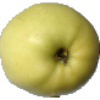

In [33]:
apple

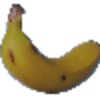

In [34]:
banana

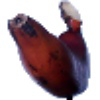

In [35]:
banana_red

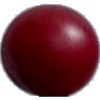

In [36]:
cherry

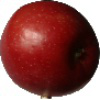

In [37]:
apple_red

## Model building

In [38]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

val_datagen = ImageDataGenerator(rescale=1./255)

In [40]:
img_size = (100, 100)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=32,
    class_mode='binary')

validation_generator = val_datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=32,
    class_mode='binary')

num_of_classes = 5

Found 2456 images belonging to 5 classes.
Found 824 images belonging to 5 classes.


In [44]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from keras.layers import Dropout, Flatten, Dense

cnn_model = Sequential()

cnn_model.add(Conv2D(filters=16, kernel_size=(2, 2), padding="same", activation="relu", input_shape=(100,100,3)))
cnn_model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))

cnn_model.add(Conv2D(filters=32, kernel_size=(3, 3), padding="same", activation="relu"))
cnn_model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))

cnn_model.add(Conv2D(filters=64, kernel_size=(4, 4), padding="same", activation="relu"))
cnn_model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))

cnn_model.add(Flatten())

cnn_model.add(Dense(256, activation="relu"))
cnn_model.add(Dense(num_of_classes, activation="softmax"))

cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
cnn_model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 100, 100, 16)      208       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 50, 50, 16)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 50, 50, 32)        4640      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 25, 25, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 25, 25, 64)        32832     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 13, 13, 64)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 10816)            

In [45]:
cnn_history = cnn_model.fit_generator(
                    train_generator,
                    steps_per_epoch=30,
                    epochs=5,
                    verbose=1,
                    validation_data=validation_generator,
                    validation_steps=30)

Epoch 1/5
30/30 [==============================] - 11s 357ms/step - loss: 1.1111 - accuracy: 0.5021 - val_loss: 0.2137 - val_accuracy: 0.8456
Epoch 2/5
30/30 [==============================] - 9s 299ms/step - loss: 0.2438 - accuracy: 0.9125 - val_loss: 0.0553 - val_accuracy: 0.9832
Epoch 3/5
30/30 [==============================] - 10s 337ms/step - loss: 0.0430 - accuracy: 0.9937 - val_loss: 0.0053 - val_accuracy: 1.0000
Epoch 4/5
30/30 [==============================] - 9s 314ms/step - loss: 0.0167 - accuracy: 0.9937 - val_loss: 0.0025 - val_accuracy: 1.0000
Epoch 5/5
30/30 [==============================] - 10s 317ms/step - loss: 0.0112 - accuracy: 0.9990 - val_loss: 6.7327e-04 - val_accuracy: 1.0000


## RNN

In [14]:
import pandas as pd

data = pd.read_csv('hourly-energy-consumption/AEP_hourly.csv', encoding='windows-1252')

data

,Datetime,AEP_MW
0,2004-12-31 01:00:00,13478.0
1,2004-12-31 02:00:00,12865.0
2,2004-12-31 03:00:00,12577.0
3,2004-12-31 04:00:00,12517.0
4,2004-12-31 05:00:00,12670.0
...,...,...
121268,2018-01-01 20:00:00,21089.0
121269,2018-01-01 21:00:00,20999.0
121270,2018-01-01 22:00:00,20820.0
121271,2018-01-01 23:00:00,20415.0


In [15]:
df = pd.read_csv('hourly-energy-consumption/AEP_hourly.csv', index_col='Datetime', parse_dates=['Datetime'])
df.head()

,AEP_MW
Datetime,
2004-12-31 01:00:00,13478.0
2004-12-31 02:00:00,12865.0
2004-12-31 03:00:00,12577.0
2004-12-31 04:00:00,12517.0
2004-12-31 05:00:00,12670.0


In [16]:
df.plot(figsize=(16,4),legend=True)

In [17]:
from sklearn.preprocessing import MinMaxScaler

def normalize_data(df):
    scaler = MinMaxScaler()
    df['AEP_MW']=scaler.fit_transform(df['AEP_MW'].values.reshape(-1,1))
    return df

df_norm = normalize_data(df)
df_norm.shape

(121273, 1)

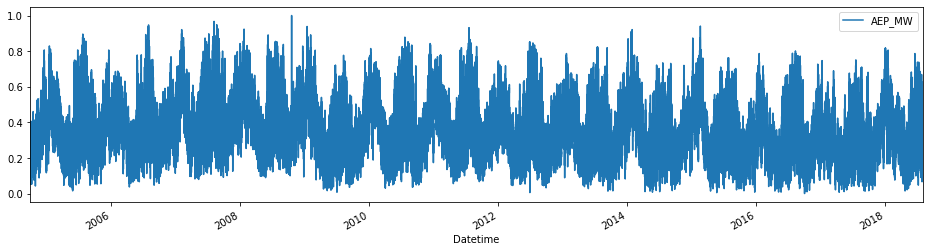

In [18]:
df.plot(figsize=(16,4),legend=True)

In [19]:
import numpy as np

def load_data(stock, seq_len):
    X_train = []
    y_train = []
    for i in range(seq_len, len(stock)):
        X_train.append(stock.iloc[i-seq_len : i, 0])
        y_train.append(stock.iloc[i, 0])
    
    X_test = X_train[110000:]             
    y_test = y_train[110000:]
    
    X_train = X_train[:110000]           
    y_train = y_train[:110000]
    
    X_train = np.array(X_train)
    y_train = np.array(y_train)
    
    X_test = np.array(X_test)
    y_test = np.array(y_test)
    
    X_train = np.reshape(X_train, (110000, seq_len, 1))
    
    X_test = np.reshape(X_test, (X_test.shape[0], seq_len, 1))
    
    return [X_train, y_train, X_test, y_test]

In [20]:
seq_len = 20
X_train, y_train, X_test, y_test = load_data(df, seq_len)

print('X_train.shape = ',X_train.shape)
print('y_train.shape = ', y_train.shape)
print('X_test.shape = ', X_test.shape)
print('y_test.shape = ',y_test.shape)

X_train.shape =  (110000, 20, 1)
y_train.shape =  (110000,)
X_test.shape =  (11253, 20, 1)
y_test.shape =  (11253,)


In [21]:
from keras.layers import Dense,Dropout,SimpleRNN

rnn_model = Sequential()

rnn_model.add(SimpleRNN(40,activation="tanh",return_sequences=True, input_shape=(X_train.shape[1],1)))
rnn_model.add(Dropout(0.15))

rnn_model.add(SimpleRNN(40,activation="tanh",return_sequences=True))
rnn_model.add(Dropout(0.15))

rnn_model.add(SimpleRNN(40,activation="tanh",return_sequences=False))
rnn_model.add(Dropout(0.15))

rnn_model.add(Dense(1))

rnn_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_1 (SimpleRNN)     (None, 20, 40)            1680      
_________________________________________________________________
dropout_1 (Dropout)          (None, 20, 40)            0         
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, 20, 40)            3240      
_________________________________________________________________
dropout_2 (Dropout)          (None, 20, 40)            0         
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, 40)                3240      
_________________________________________________________________
dropout_3 (Dropout)          (None, 40)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                

In [22]:
from keras.optimizers import Adam

opt = Adam(lr=0.001, decay=1e-6)

rnn_model.compile(
    optimizer=opt,
    loss="MSE")

rnn_model.fit(X_train,y_train,
          epochs=3,
          verbose=1,
          validation_data=(X_test, y_test))

Train on 110000 samples, validate on 11253 samples
Epoch 1/3
110000/110000 [==============================] - 39s 356us/step - loss: 0.0081 - val_loss: 6.2083e-04
Epoch 2/3
110000/110000 [==============================] - 39s 350us/step - loss: 0.0012 - val_loss: 6.2827e-04
Epoch 3/3
110000/110000 [==============================] - 39s 351us/step - loss: 0.0010 - val_loss: 6.2572e-04


In [23]:

from sklearn.metrics import r2_score


rnn_predictions = rnn_model.predict(X_test)

rnn_score = r2_score(y_test,rnn_predictions)
print("R2 Score of RNN model = ",rnn_score)

R2 Score of RNN model =  0.9733560438229244


Populating the interactive namespace from numpy and matplotlib


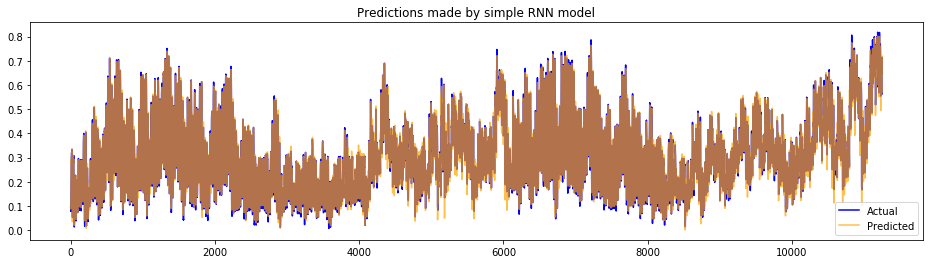

In [24]:

%pylab inline

def plot_predictions(test, predicted, title):
    plt.figure(figsize=(16,4))
    plt.plot(test, color='blue',label='Actual')
    plt.plot(predicted, alpha=0.7, color='orange',label='Predicted')
    plt.title(title)
    plt.legend()
    plt.show()
    
plot_predictions(y_test, rnn_predictions, "Predictions made by simple RNN model")